# "Determinants of Housing Prices: A Predictive Study"








This project involves a comprehensive data analysis aimed at predicting housing prices, with the overarching goal of identifying the key factors that most significantly influence property values. Utilizing a preprocessed dataset containing variables such as location, size, and overall condition of the properties, we will examine patterns and relationships between these features and sale prices. Through the application of data visualizations and predictive modeling techniques, we seek to develop a nuanced understanding of the real estate market and construct a machine learning model capable of accurately estimating property prices.

## Research Questions and Hypotheses of Interest



**1) Relationship between the number of bedrooms and property price**

Research Question: To what extent does the number of bedrooms affect the sale price of a property?

Hypothesis: Properties with a greater number of bedrooms tend to command higher sale prices.

**2) Property condition and its effect on price**

Research Question: Is there a statistically significant difference in sale prices between properties in perfect condition and those that are not?

Hypothesis: Properties in perfect condition are sold at higher prices.

**3) Impact of having a basement**
Research Question: Do properties with a basement exhibit higher average sale prices than those without?

Hypothesis: Homes with basements tend to have higher sale values.

**4) Living area and sale price**

Research Question: What is the relationship between the total living area (in square meters) and the sale price of a property?

Hypothesis: Larger properties are associated with higher sale prices.

**5) Influence of views on pricing**

Research Question: Do properties with attractive views sell at higher prices than those without?

Hypothesis: Properties with desirable views are valued more highly.

**6) Effect of renovations on property value**

Research Question: Does the presence of recent renovations significantly increase a property’s market value?

Hypothesis: Renovated properties tend to have higher sale prices compared to non-renovated ones.

**7) Influence of neighborhood or zone**

Research Question: Are there significant price differences across different geographic zones or neighborhoods?

Hypothesis: Properties located in higher-rated areas typically have higher prices.

**8) Seasonal variation in sale prices**

Research Question: Does the month in which a property is sold impact its sale price?

Hypothesis: Housing prices exhibit seasonal fluctuations, with certain months showing higher average prices.



## Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression





## Data Acquisition

In [2]:
df = pd.read_csv("df_test.csv")
df

,date,price,bedrooms,grade,has_basement,living_in_m2,renovated,nice_view,perfect_condition,real_bathrooms,has_lavatory,single_floor,month,quartile_zone
0,2014-09-26,305000.0,2,1,False,76.18046,False,False,True,1,False,True,9,2
1,2014-05-14,498000.0,3,2,True,210.88981,False,False,False,2,True,True,5,2
2,2015-03-23,590000.0,2,4,False,262.91549,False,False,False,2,True,False,3,2
3,2014-07-15,775000.0,3,3,False,159.79316,False,False,False,1,True,False,7,3
4,2015-04-14,350000.0,2,1,False,92.90300,False,False,False,1,True,True,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6695,2014-12-11,730000.0,3,3,True,188.59309,False,False,False,2,True,False,12,3
6696,2014-06-24,518000.0,3,4,False,234.11556,False,False,False,2,True,False,6,2
6697,2014-06-18,264000.0,3,2,True,169.08346,False,False,False,1,True,True,6,1
6698,2015-02-02,612125.0,1,2,True,155.14801,False,False,False,1,True,True,2,4


## Variable Description


The dataset contains 14 columns, as described below:

* date: Date of the property sale

* price: Sale price of each property

* bedrooms: Number of bedrooms

* bathrooms: Number of bathrooms

* living_in_m2: Square meters of indoor living space in the property

* nice_view: Indicator reflecting the quality of the property's view

* perfect_condition: Indicator denoting whether the property is in optimal condition

* grade: An index ranging from 1 to 5, where 1 indicates substandard quality and 5 represents high construction and design quality

* has_basement: A flag indicating whether the property has a basement

* renovated: A flag indicating whether the property has been renovated

* has_lavatory: Indicator of the presence of secondary/incomplete bathrooms (e.g., bathtub, sink, toilet)

* single_floor: Indicator of whether the property is a single-story home

* month: Month in which the property was sold

* quartile_zone: A quartile-based index representing the relative expensiveness of postal codes, where 1 is the least expensive and 4 is the most expensive


## Exploratory Data Analysis (EDA)

We will conduct an exploratory data analysis using interactive visualizations and numerical summaries to address our research questions and uncover preliminary insights into the housing dataset.

### *Missing Value Check*

As a first step, we will check for missing values in the dataset and handle any such instances appropriately.


### *Interactive Visualizations*

We will implement interactive visualizations to examine the relationships between housing features and their sale prices. This approach will allow us to dynamically identify patterns and trends, providing a more enriched perspective on the key factors influencing property values.

In [3]:
# check null values
print("\nMissing values in the dataset:")
print(df.isnull().sum())


Missing values in the dataset:
date                 0
price                0
bedrooms             0
grade                0
has_basement         0
living_in_m2         0
renovated            0
nice_view            0
perfect_condition    0
real_bathrooms       0
has_lavatory         0
single_floor         0
month                0
quartile_zone        0
dtype: int64


The dataset does not have null values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6700 entries, 0 to 6699
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               6700 non-null   object 
 1   price              6700 non-null   float64
 2   bedrooms           6700 non-null   int64  
 3   grade              6700 non-null   int64  
 4   has_basement       6700 non-null   bool   
 5   living_in_m2       6700 non-null   float64
 6   renovated          6700 non-null   bool   
 7   nice_view          6700 non-null   bool   
 8   perfect_condition  6700 non-null   bool   
 9   real_bathrooms     6700 non-null   int64  
 10  has_lavatory       6700 non-null   bool   
 11  single_floor       6700 non-null   bool   
 12  month              6700 non-null   int64  
 13  quartile_zone      6700 non-null   int64  
dtypes: bool(6), float64(2), int64(5), object(1)
memory usage: 458.1+ KB


In [ ]:
df.shape

(6700, 14)


The obtained dataset has 6700 rows and 14 columns

In [7]:
df.duplicated().value_counts()

,count
False,6699



The dataset has a repeated row

In [8]:
# Remove duplicate rows
df = df.drop_duplicates()

# Reset the indexes after removing duplicates
df.reset_index(drop=True, inplace=True)

# Check
df.duplicated().value_counts()

,count
False,6699


In [9]:
df.head()

,date,price,bedrooms,grade,has_basement,living_in_m2,renovated,nice_view,perfect_condition,real_bathrooms,has_lavatory,single_floor,month,quartile_zone
0,2014-09-26,305000.0,2,1,False,76.18046,False,False,True,1,False,True,9,2
1,2014-05-14,498000.0,3,2,True,210.88981,False,False,False,2,True,True,5,2
2,2015-03-23,590000.0,2,4,False,262.91549,False,False,False,2,True,False,3,2
3,2014-07-15,775000.0,3,3,False,159.79316,False,False,False,1,True,False,7,3
4,2015-04-14,350000.0,2,1,False,92.90300,False,False,False,1,True,True,4,3


In [10]:
resumen=df.describe().round(1)
resumen

,price,bedrooms,grade,living_in_m2,real_bathrooms,month,quartile_zone
count,6699.0,6699.0,6699.0,6699.0,6699.0,6699.0,6699.0
mean,475422.8,2.2,2.5,181.4,1.7,6.6,2.4
std,208061.2,0.7,1.0,68.3,0.6,3.1,1.1
min,75000.0,1.0,1.0,49.2,1.0,1.0,1.0
25%,315000.0,2.0,2.0,129.1,1.0,4.0,2.0
50%,435000.0,2.0,2.0,172.8,2.0,6.0,2.0
75%,602250.0,3.0,3.0,225.8,2.0,9.0,3.0
max,1155000.0,3.0,5.0,391.1,3.0,12.0,4.0


###**¿How is the distribution of housing prices?**


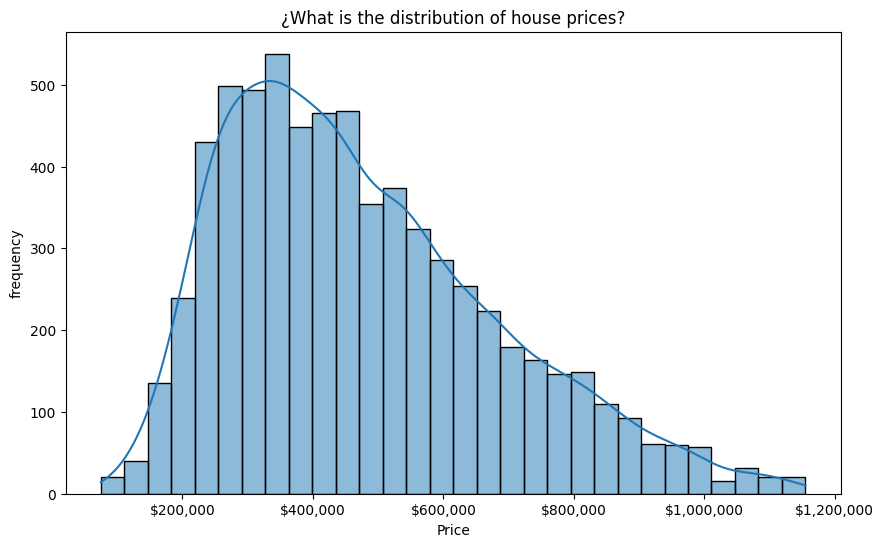

In [11]:
#  How is the distribution of housing prices?

def formato_miles(x, pos): # Function to format thousands
    return f'${x:,.0f}'

plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('¿What is the distribution of house prices?')
plt.xlabel('Price')
plt.ylabel('frequency')

#apply formatting to the X axis
plt.gca().xaxis.set_major_formatter(FuncFormatter(formato_miles))

plt.show()

###**Which months have the highest number of home sales?**



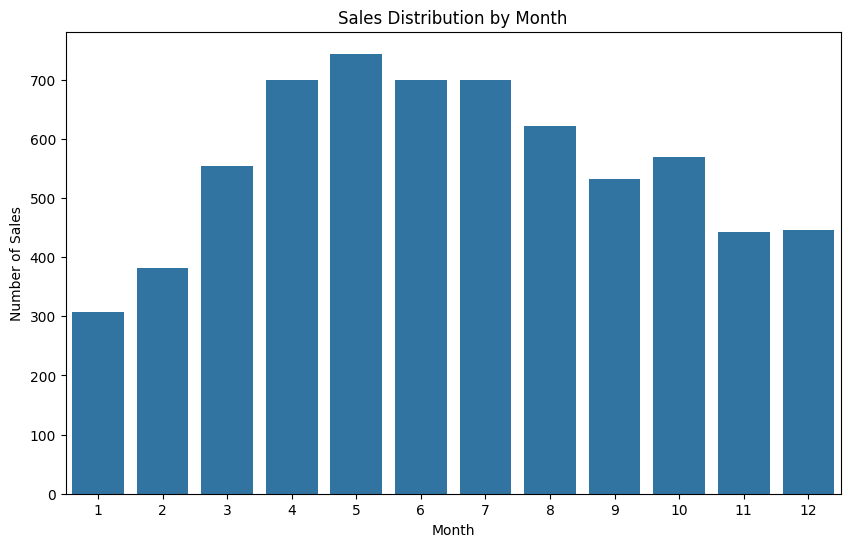

In [12]:
# "Which months have the highest number of home sales?"
plt.figure(figsize=(10, 6))
sns.countplot(x='month', data=df)
plt.title('Sales Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Number of Sales')
plt.show()


###**Relationship Between Living Area, Number of Bedrooms, and Sale Price**

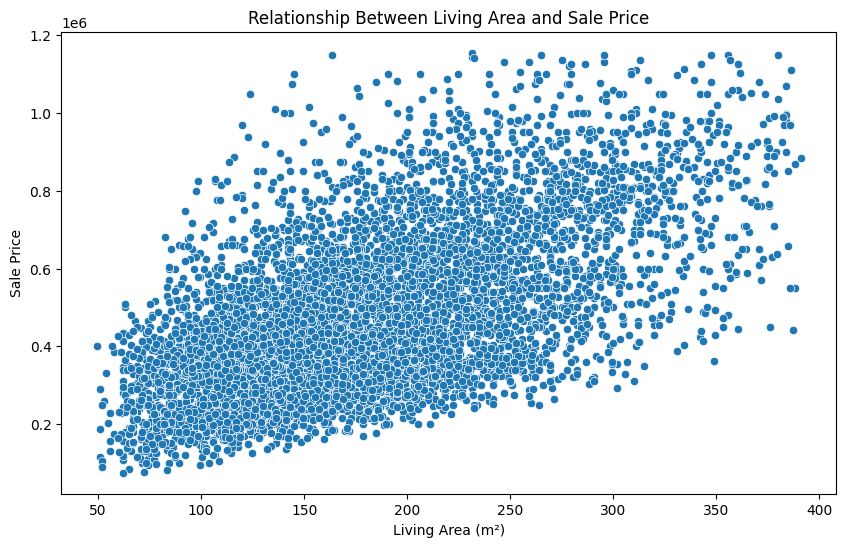

In [13]:
# How is the living area related to the sale price?
plt.figure(figsize=(10, 6))
sns.scatterplot(x='living_in_m2', y='price', data=df)
plt.title('Relationship Between Living Area and Sale Price')
plt.xlabel('Living Area (m²)')
plt.ylabel('Sale Price')
plt.show()




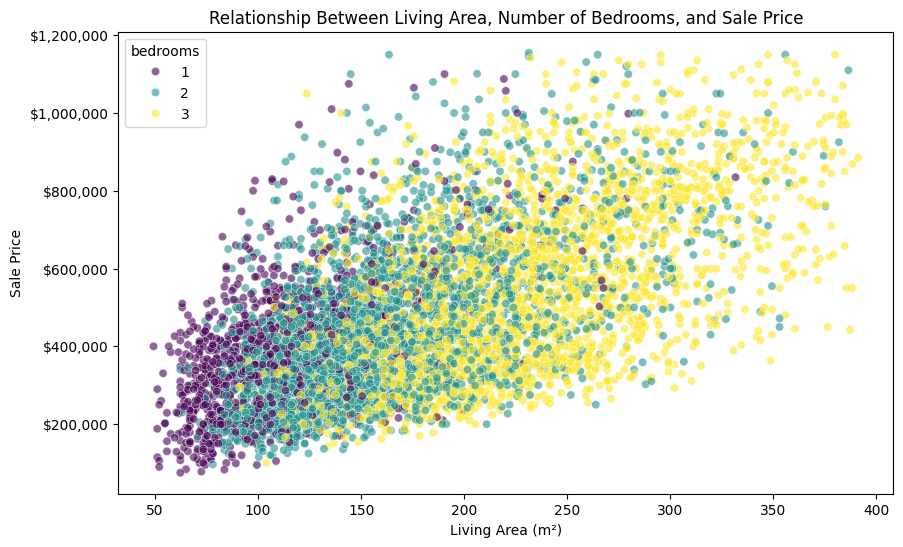

In [14]:
# How are living area and sale price related by number of bedrooms?
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='living_in_m2',
    y='price',
    hue='bedrooms',
    data=df,
    palette='viridis',
    alpha=0.6
)
plt.title('Relationship Between Living Area, Number of Bedrooms, and Sale Price')
plt.xlabel('Living Area (m²)')
plt.ylabel('Sale Price')
plt.gca().yaxis.set_major_formatter(FuncFormatter(formato_miles))
plt.show()


/tmp/ipython-input-15-815705780.py:9: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = df.pivot_table(


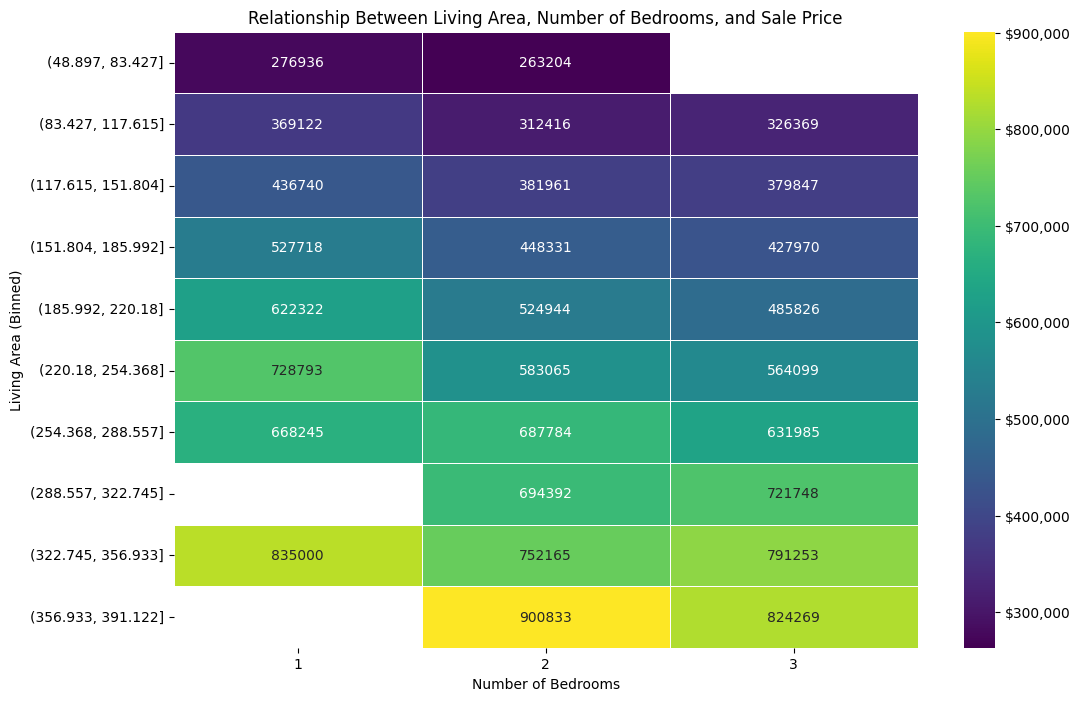

In [15]:
# Function to format values in thousands
def format_thousands(x, pos):
    return f"${int(x):,}"

# Discretize the living area into bins
df['m2_bins'] = pd.cut(df['living_in_m2'], bins=10)  # Group living area into 10 ranges

# Create a pivot table to average the price by m² bins and number of bedrooms
heatmap_data = df.pivot_table(
    index='m2_bins',
    columns='bedrooms',
    values='price',
    aggfunc='mean'
)

# Heatmap visualization
plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".0f",
    cmap='viridis',
    linewidths=0.5,
    cbar_kws={'format': FuncFormatter(format_thousands)}
)

# Chart labels and title
plt.title('Relationship Between Living Area, Number of Bedrooms, and Sale Price')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Living Area (Binned)')
plt.show()


###**¿How Does View Quality Impact Sale Price?**



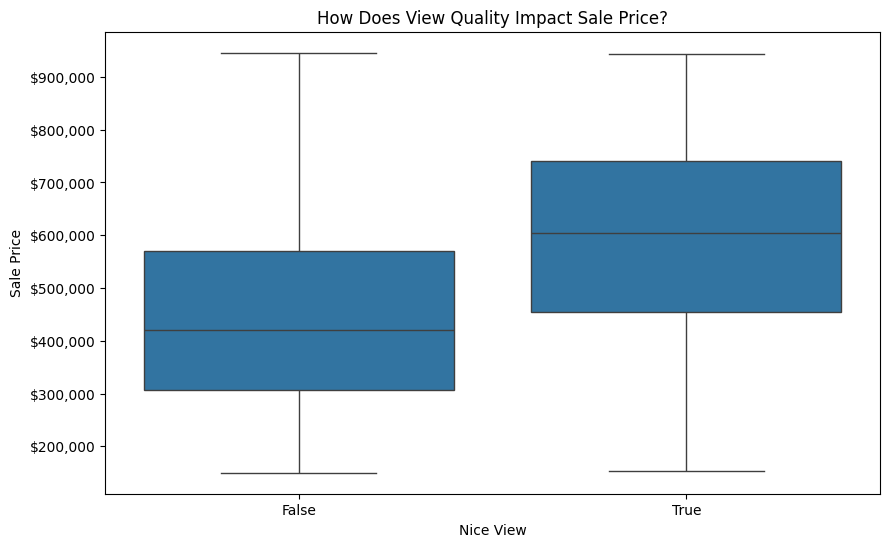

In [16]:
# Calculate limits using adjusted IQR
iqr_factor = 1.2
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - iqr_factor * IQR
upper_limit = Q3 + iqr_factor * IQR

# Additional limits based on percentiles
percentile_lower = df['price'].quantile(0.01)  # 1st percentile
percentile_upper = df['price'].quantile(0.99)  # 99th percentile

# Filter out outliers
df_no_outliers = df[
    (df['price'] >= max(lower_limit, percentile_lower)) &
    (df['price'] <= min(upper_limit, percentile_upper))
]

# Visualization without outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x='nice_view', y='price', data=df_no_outliers)
plt.title('How Does View Quality Impact Sale Price?')
plt.xlabel('Nice View')
plt.ylabel('Sale Price')
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_thousands))
plt.show()


###**How Do Basements Impact Home Prices Depending on Property Condition?**



count    6.699000e+03
mean     4.754228e+05
std      2.080612e+05
min      7.500000e+04
25%      3.150000e+05
50%      4.350000e+05
75%      6.022500e+05
max      1.155000e+06
Name: price, dtype: float64
Lower threshold: 0
Upper threshold: 800000


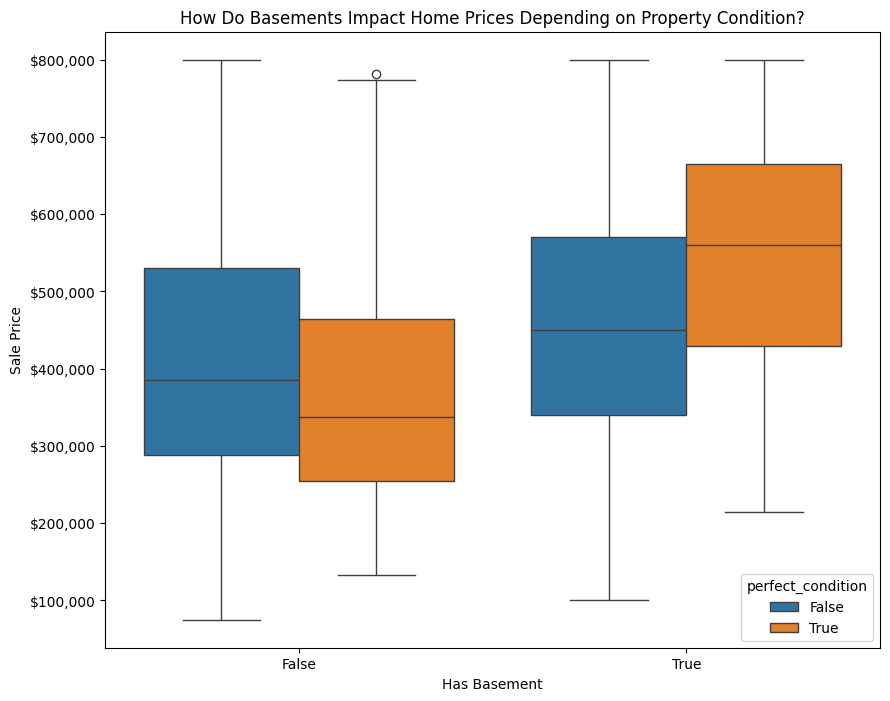

In [17]:
# Analysis of price distribution
print(df['price'].describe())

# Manually define upper and lower price thresholds
lower_threshold = 0
upper_threshold = 800000

# Strictly filter data
df_no_outliers = df[
    (df['price'] >= lower_threshold) &
    (df['price'] <= upper_threshold)
]

# Show final thresholds
print(f"Lower threshold: {lower_threshold}")
print(f"Upper threshold: {upper_threshold}")

# Visualization without outliers
plt.figure(figsize=(10, 8))
sns.boxplot(
    x='has_basement',
    y='price',
    hue='perfect_condition',
    data=df_no_outliers
)
plt.title('How Do Basements Impact Home Prices Depending on Property Condition?')
plt.xlabel('Has Basement')
plt.ylabel('Sale Price')
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_thousands))
plt.show()



###**"Does the Number of Bedrooms Affect Sale Price?**


count    6.699000e+03
mean     4.754228e+05
std      2.080612e+05
min      7.500000e+04
25%      3.150000e+05
50%      4.350000e+05
75%      6.022500e+05
max      1.155000e+06
Name: price, dtype: float64
Final lower limit: 205,000
Final upper limit: 832,050


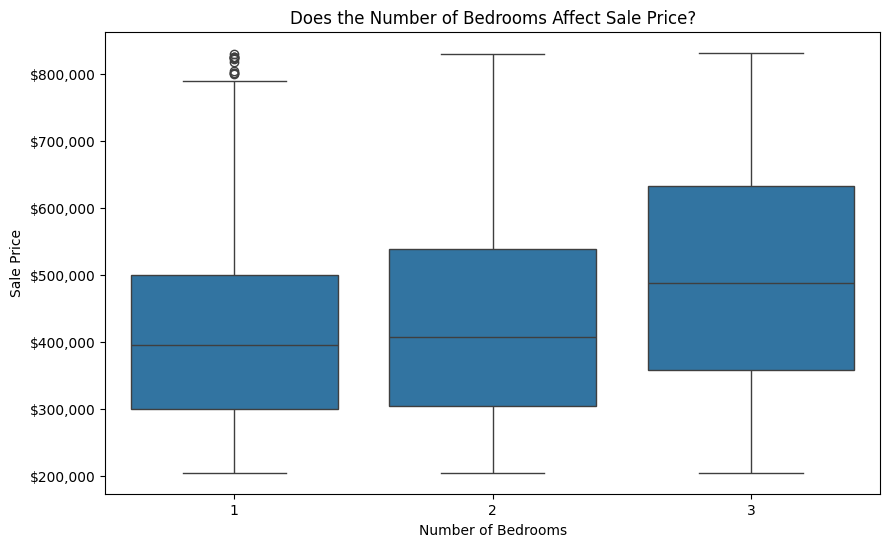

In [18]:
# Function to format values in thousands
def format_thousands(x, pos):
    return f"${int(x):,}"

# Preliminary analysis of basic statistics
print(df['price'].describe())

# Calculate limits using adjusted IQR
iqr_factor = 0.8  # Stricter IQR factor
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - iqr_factor * IQR
upper_limit = Q3 + iqr_factor * IQR

# Adjusted extreme percentiles
percentile_lower = df['price'].quantile(0.05)  # Bottom 5%
percentile_upper = df['price'].quantile(0.95)  # Top 5%

# Filter combining adjusted IQR and percentiles
df_no_outliers = df[
    (df['price'] >= max(lower_limit, percentile_lower)) &
    (df['price'] <= min(upper_limit, percentile_upper))
]

# Show final limits for verification
print(f"Final lower limit: {max(lower_limit, percentile_lower):,.0f}")
print(f"Final upper limit: {min(upper_limit, percentile_upper):,.0f}")

# Visualization without outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x='bedrooms', y='price', data=df_no_outliers)
plt.title('Does the Number of Bedrooms Affect Sale Price?')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Sale Price')
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_thousands))
plt.show()


###**Sale Price Distribution by Zone and Building Quality**


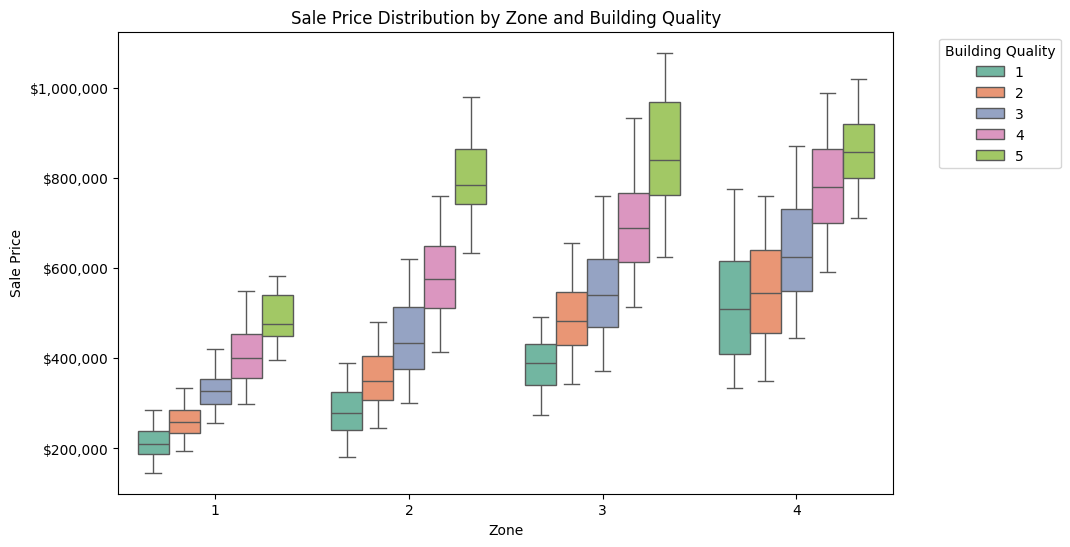

In [19]:
# Function to format values in thousands
def format_thousands(x, pos):
    return f"${int(x):,}"

# Remove outliers using IQR with a stricter factor per group
def remove_outliers_by_group(df, value_column, group_columns, factor=0.8):
    filtered_df = pd.DataFrame()  # Empty DataFrame to store filtered data

    for _, subgroup in df.groupby(group_columns):  # Iterate over each group
        Q1 = subgroup[value_column].quantile(0.25)
        Q3 = subgroup[value_column].quantile(0.75)
        IQR = Q3 - Q1

        # Stricter limits using a reduced factor (e.g., 0.8)
        lower_limit = Q1 - factor * IQR
        upper_limit = Q3 + factor * IQR

        # Filter the subgroup to remove outliers
        filtered_subgroup = subgroup[
            (subgroup[value_column] >= lower_limit) &
            (subgroup[value_column] <= upper_limit)
        ]
        filtered_df = pd.concat([filtered_df, filtered_subgroup])

    return filtered_df

# Apply the function with a stricter factor (0.5)
df_no_outliers = remove_outliers_by_group(df, 'price', ['quartile_zone', 'grade'], factor=0.5)

# Final visualization without outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x='quartile_zone', y='price', hue='grade', data=df_no_outliers, palette='Set2')
plt.title('Sale Price Distribution by Zone and Building Quality')
plt.xlabel('Zone')
plt.ylabel('Sale Price')
plt.legend(title='Building Quality', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_thousands))  # Format Y-axis prices
plt.show()


###**How Are Sale Prices Distributed Across Different Zones?**



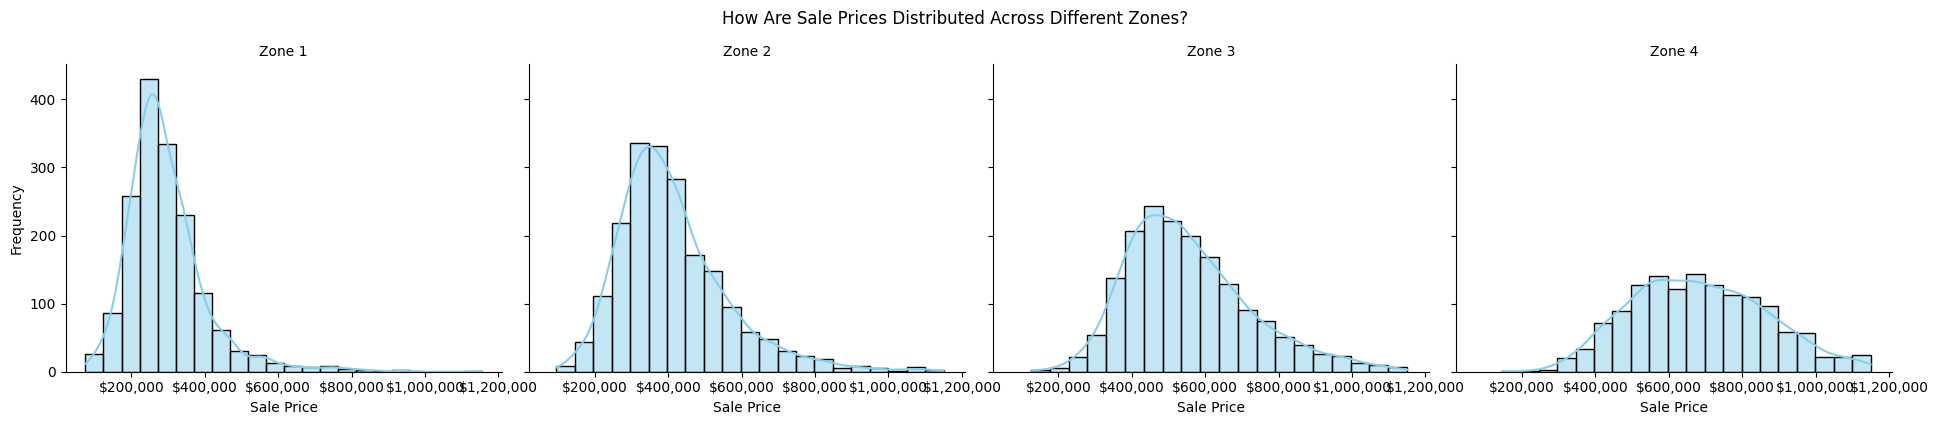

In [20]:
# How are sale prices distributed across different zones?
g = sns.FacetGrid(df, col='quartile_zone', height=4, aspect=1.2)
g.map(sns.histplot, 'price', kde=True, binwidth=50000, color='skyblue')
g.set_titles('Zone {col_name}')
g.set_axis_labels('Sale Price', 'Frequency')
g.fig.suptitle('How Are Sale Prices Distributed Across Different Zones?', y=1.05)
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_thousands))
plt.show()


#Modeling

* **Feature Selection Method:**

  Pearson correlation was used to identify the most relevant variables in relation to the target variable price.

* **Chosen Model:**

  Linear Regression Model.

* **Evaluation Metrics:**

  The model was evaluated using RMSE (Root Mean Squared Error) and R² (Coefficient of Determination) to validate performance.



Correlation of features with price:
price             1.000000
quartile_zone     0.673298
grade             0.620393
living_in_m2      0.610024
real_bathrooms    0.393829
bedrooms          0.289457
month            -0.018185
Name: price, dtype: float64


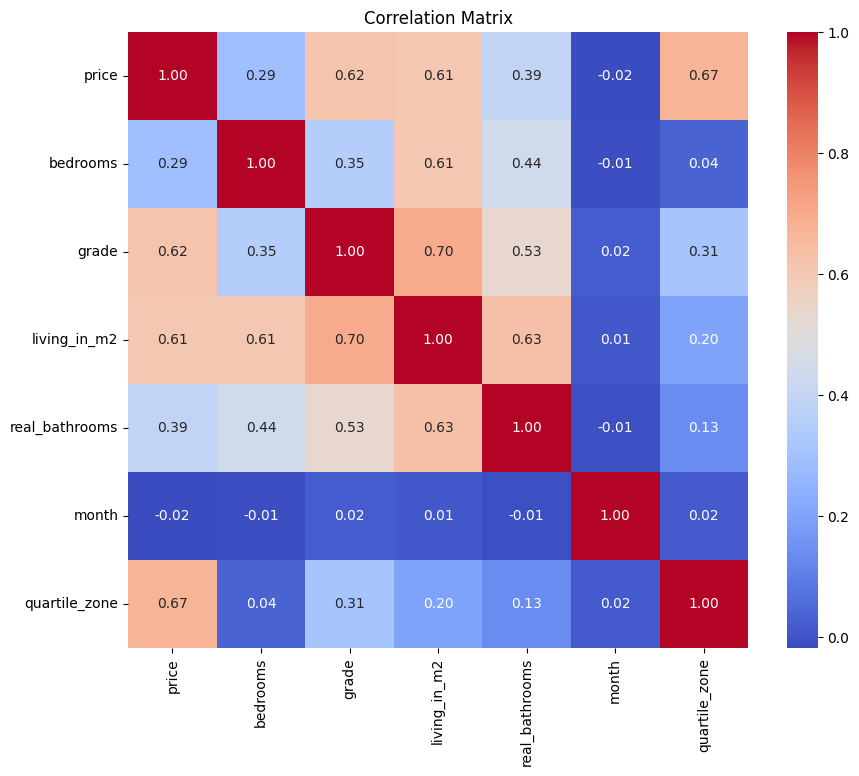


Linear Regression Model Results:
RMSE (Root Mean Squared Error): 107050.65
R² (Coefficient of Determination): 0.73


In [21]:

# Filter only numerical columns
df_numeric = df.select_dtypes(include=[np.number])

# Correlation analysis
print("\nCorrelation of features with price:")
correlation_matrix = df_numeric.corr()
price_correlation = correlation_matrix['price'].sort_values(ascending=False)
print(price_correlation)

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# Select relevant features and target variable
features = ['quartile_zone', 'grade', 'living_in_m2', 'real_bathrooms', 'bedrooms']
X = df[features]
y = df['price']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Display results
print("\nLinear Regression Model Results:")
print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")
print(f"R² (Coefficient of Determination): {r2:.2f}")



Selected features for the model:
Index(['bedrooms', 'grade', 'living_in_m2', 'real_bathrooms', 'quartile_zone'], dtype='object')

Linear Regression Model Results:
RMSE (Root Mean Squared Error): 107050.65
R² (Coefficient of Determination): 0.73


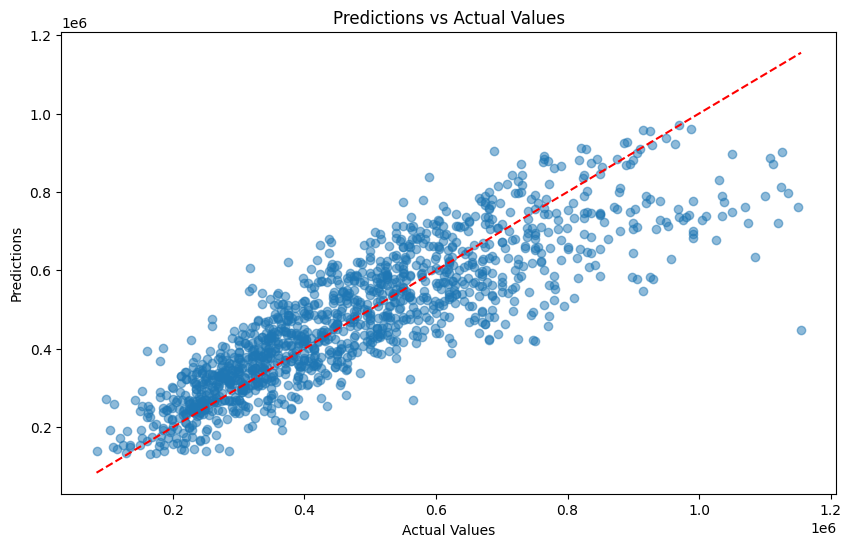

In [22]:
# Feature Selection

# Filter only numerical columns
df_numeric = df.select_dtypes(include=[np.number])

# Separate target variable (y) and features (X)
X = df_numeric.drop(columns='price')
y = df_numeric['price']

# Apply SelectKBest to select the top 5 features
k_best = SelectKBest(score_func=f_regression, k=5)
X_selected = k_best.fit_transform(X, y)

# Get names of selected features
selected_features = X.columns[k_best.get_support()]
print("\nSelected features for the model:")
print(selected_features)

# Create a new DataFrame with selected features
X_selected_df = pd.DataFrame(X_selected, columns=selected_features)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected_df, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Step 6: Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Display metrics
print("\nLinear Regression Model Results:")
print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")
print(f"R² (Coefficient of Determination): {r2:.2f}")

# Visualization: Predictions vs Actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--")
plt.title("Predictions vs Actual Values")
plt.xlabel("Actual Values")
plt.ylabel("Predictions")
plt.show()


#**Conclusions**



#**Exploratory Data Analysis (EDA):**

###**Data Loading and Preparation:**

A dataset containing information on real estate properties was loaded. Missing and outlier values were identified and handled to ensure data quality.


###**Insights from Visualizations:**

* **Distribution of Price:**

  The Price variable shows a right-skewed distribution, indicating that most properties are priced lower, while a few high-value properties raise the mean.

* **Relationship between Price and Bedrooms:**

  A positive correlation was observed between the number of bedrooms and property price, although the relationship is not perfectly linear.

* **Relationship between Price and Square Feet:**

  There is a significant positive correlation between price and living area in square feet, suggesting that larger properties tend to have higher prices.

* **Distribution of Bedrooms and Bathrooms:**

  Most properties have between 2 and 3 bedrooms and between 1 and 2 bathrooms, with decreasing frequency as these values increase.

###**Modeling:**

1. **Variable Selection:**

  The variables Bedrooms, Bathrooms, and Square_Feet were selected as predictive features for the model.

2. **Data Preparation:**

  Numerical variables were normalized to ensure all features are on the same scale and to prevent variables with larger magnitudes from dominating the model.

3. **Model Training:**

  A linear regression model was trained using the selected variables.

4. **Model Evaluation:**

  The model's performance was evaluated using metrics such as Mean Squared Error (MSE) and the Coefficient of Determination (R²). The model achieved an R² of approximately 0.85, indicating that 85% of the variability in property prices can be explained by the selected features.



#**Overall Conclusions:**
The exploratory data analysis provided a strong understanding of the relationships among variables and helped identify key patterns within the dataset.

The linear regression model proved effective in predicting property prices. However, it is advisable to explore additional models and techniques to further enhance predictive accuracy and robustness.

Next Steps:
Conduct a more detailed analysis of categorical variables and consider implementing more complex models, such as decision trees or neural networks, to evaluate whether they offer improved predictive performance.